In [40]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.neighbors import KNeighborsClassifier
import seaborn as sns

In [41]:
train_X = pd.read_excel('.\\preprocess\\train_x_data.xlsx')
train_y = pd.read_excel('.\\preprocess\\train_y_data.xlsx')
test_X = pd.read_excel('.\\preprocess\\test_x_data.xlsx')
test_y = pd.read_excel('.\\preprocess\\test_y_data.xlsx')

train_X

,SPYG,Cocoa,Coffee,Cotton,Sugar,Oats,Rough Rice,Soybeans,Kansas Wheat,Copper,Gold,Palladium,Platinum,Silver,Natural Gas,Feeder Cattle,Lean Hogs,Live Cattle
0,33.279999,1936,130.199997,77.500000,15.330000,242.50,1153.5,955.00,434.75,3.2560,1313.699951,1090.000000,943.799988,17.121000,3.056,149.524994,70.724998,123.349998
1,33.570000,1907,128.600006,78.110001,15.310000,244.50,1141.0,959.75,441.00,3.2370,1316.199951,1086.000000,957.799988,17.184999,3.008,149.375000,71.050003,122.949997
2,33.700001,1905,129.550003,79.250000,15.250000,245.75,1147.5,959.25,439.75,3.2425,1319.400024,1097.400024,966.099976,17.188999,2.880,149.024994,71.375000,122.250000
3,34.029999,1895,128.449997,78.010002,15.080000,248.50,1156.5,961.50,437.50,3.2070,1320.300049,1084.849976,971.200012,17.205000,2.795,146.625000,71.425003,119.250000
4,34.099998,1914,125.150002,78.139999,14.780000,250.00,1164.5,958.25,433.25,3.2010,1318.599976,1098.550049,972.299988,17.063999,2.835,146.449997,72.974998,117.224998
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1342,59.279999,3206,167.949997,77.070000,23.719999,391.25,1794.0,1521.00,866.50,3.7865,1923.699951,1291.800049,936.700012,22.805000,2.791,233.675003,93.400002,177.699997
1343,59.930000,3212,169.449997,77.639999,23.030001,385.00,1767.5,1495.00,837.75,3.7815,1914.000000,1283.199951,936.599976,22.938999,2.763,238.500000,94.125000,179.300003
1344,60.000000,3292,165.649994,80.120003,22.570000,377.00,1748.5,1451.00,800.75,3.7205,1912.300049,1236.000000,923.400024,22.868000,2.603,240.250000,94.275002,179.625000
1345,60.209999,3218,163.600006,81.250000,22.070000,367.75,1770.5,1483.00,794.25,3.6775,1909.199951,1218.800049,897.799988,22.591000,2.701,242.375000,95.449997,179.750000


In [42]:
# 결측치 확인
print(train_X.isnull().sum())
print(train_y.isnull().sum())
print(test_X.isnull().sum())
print(test_y.isnull().sum())

SPYG             0
Cocoa            0
Coffee           0
Cotton           0
Sugar            0
Oats             0
Rough Rice       0
Soybeans         0
Kansas Wheat     0
Copper           0
Gold             0
Palladium        0
Platinum         0
Silver           0
Natural Gas      0
Feeder Cattle    0
Lean Hogs        0
Live Cattle      0
dtype: int64
Brent Crude Oil    0
dtype: int64
SPYG             0
Cocoa            0
Coffee           0
Cotton           0
Sugar            0
Oats             0
Rough Rice       0
Soybeans         0
Kansas Wheat     0
Copper           0
Gold             0
Palladium        0
Platinum         0
Silver           0
Natural Gas      0
Feeder Cattle    0
Lean Hogs        0
Live Cattle      0
dtype: int64
Brent Crude Oil    0
dtype: int64


In [43]:
# 데이터 통합
train_data = pd.concat([train_X, train_y], axis=1)
test_data = pd.concat([test_X, test_y], axis=1)

# 상관관계 계산
correlation = train_data.corr()

# 타겟 변수와의 상관관계 추출
correlation_with_target = correlation['Brent Crude Oil'].sort_values(ascending=False)
print("타겟 변수와의 상관관계:\n", correlation_with_target)

# 상관관계 계산
correlation = train_data.corr()

# 타겟 변수와의 상관관계 추출
correlation_with_target = correlation['Brent Crude Oil'].sort_values(ascending=False)
print("타겟 변수와의 상관관계:\n", correlation_with_target)


타겟 변수와의 상관관계:
 Brent Crude Oil    1.000000
Cotton             0.819240
Kansas Wheat       0.782843
Natural Gas        0.745098
Coffee             0.731278
Soybeans           0.687027
Lean Hogs          0.672630
Live Cattle        0.638459
Copper             0.620224
Oats               0.613573
Feeder Cattle      0.594026
Sugar              0.584207
Rough Rice         0.415543
SPYG               0.404252
Platinum           0.270246
Silver             0.176611
Gold               0.127774
Cocoa              0.085087
Palladium         -0.030591
Name: Brent Crude Oil, dtype: float64
타겟 변수와의 상관관계:
 Brent Crude Oil    1.000000
Cotton             0.819240
Kansas Wheat       0.782843
Natural Gas        0.745098
Coffee             0.731278
Soybeans           0.687027
Lean Hogs          0.672630
Live Cattle        0.638459
Copper             0.620224
Oats               0.613573
Feeder Cattle      0.594026
Sugar              0.584207
Rough Rice         0.415543
SPYG               0.404252
Platinum

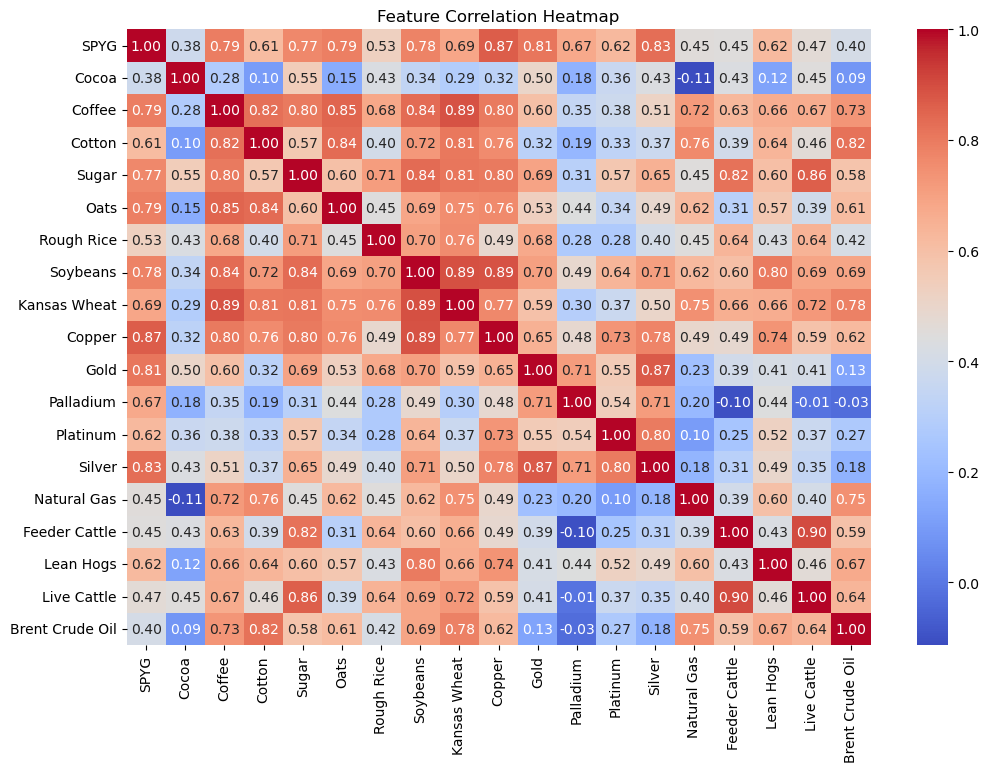

In [44]:
import seaborn as sns
import matplotlib.pyplot as plt

# 상관관계 히트맵
plt.figure(figsize=(12, 8))
sns.heatmap(train_data.corr(), annot=True, cmap='coolwarm', fmt='.2f')
plt.title("Feature Correlation Heatmap")
plt.show()


In [45]:
# 타겟 변수 제외한 상관관계 기반 Feature Selection
threshold=0.4
correlation_with_target = correlation['Brent Crude Oil'].drop(labels=['Brent Crude Oil'])
selected_features = correlation_with_target[correlation_with_target.abs() > threshold].index.tolist()

print("선택된 변수들:", selected_features)

선택된 변수들: ['SPYG', 'Coffee', 'Cotton', 'Sugar', 'Oats', 'Rough Rice', 'Soybeans', 'Kansas Wheat', 'Copper', 'Natural Gas', 'Feeder Cattle', 'Lean Hogs', 'Live Cattle']


In [46]:
# 피처 셀렉션
selected_train_X=train_X[selected_features]
selected_test_X=test_X[selected_features]

selected_test_X

,SPYG,Coffee,Cotton,Sugar,Oats,Rough Rice,Soybeans,Kansas Wheat,Copper,Natural Gas,Feeder Cattle,Lean Hogs,Live Cattle
0,61.049999,162.500000,83.430000,23.320000,379.25,1804.5,1562.00,798.75,3.7790,2.709,247.899994,97.824997,176.824997
1,60.939999,161.050003,82.449997,23.530001,402.50,1827.0,1547.25,849.25,3.7535,2.657,244.699997,101.275002,174.949997
2,60.470001,162.350006,82.879997,23.250000,416.75,1864.0,1525.75,843.25,3.7200,2.609,242.274994,100.050003,174.574997
3,60.240002,162.800003,81.199997,23.530001,406.25,1868.5,1485.50,817.50,3.7670,2.582,245.425003,99.000000,177.000000
4,60.209999,161.750000,79.949997,23.440001,414.00,1910.0,1508.00,810.50,3.7715,2.669,246.250000,98.800003,177.199997
...,...,...,...,...,...,...,...,...,...,...,...,...,...
245,79.110001,238.000000,71.290001,19.410000,308.50,1851.5,1175.25,581.50,4.5270,2.811,258.899994,89.949997,188.899994
246,80.080002,231.199997,72.599998,19.100000,304.75,1861.0,1163.25,576.00,4.3810,2.756,259.049988,89.000000,189.475006
247,80.519997,226.350006,72.699997,19.240000,294.50,1780.0,1162.75,580.00,4.3675,2.628,261.774994,89.900002,192.925003
248,80.720001,228.250000,72.019997,20.120001,304.00,1675.5,1152.25,592.00,4.3285,2.685,260.649994,89.449997,194.175003


In [47]:
from sklearn.preprocessing import StandardScaler

# StandardScaler 객체 생성
scaler = StandardScaler()

# 데이터 표준화
pivot_train_X_scaled = scaler.fit_transform(train_X)
pivot_test_X_scaled = scaler.transform(test_X)
pivot_train_y_scaled = scaler.fit_transform(train_y)
pivot_test_y_scaled = scaler.transform(test_y)

# 표준화된 결과 확인
print(pivot_train_X_scaled[:5])  # 첫 5개 행 출력

[[-1.35928698 -2.27881345 -0.31896259 -0.30428429 -0.065912   -0.90395425
  -0.89151216 -0.74203782 -0.95273171 -0.19448044 -1.28457483 -1.35633492
   0.00694284 -0.72490451 -0.25792155 -0.19937907 -0.350508   -0.05303156]
 [-1.33375823 -2.40155207 -0.35243856 -0.27476546 -0.07108287 -0.89014585
  -0.9435787  -0.72563201 -0.92318337 -0.22114479 -1.27468632 -1.36385248
   0.13323774 -0.70979497 -0.28513215 -0.20632476 -0.33254535 -0.07342589]
 [-1.32231425 -2.4100168  -0.33256215 -0.21959921 -0.08659597 -0.8815156
  -0.9165041  -0.72735893 -0.92909304 -0.21342607 -1.26202873 -1.34242738
   0.20811247 -0.70885068 -0.35769349 -0.22253229 -0.31458312 -0.10911567]
 [-1.29326455 -2.45234046 -0.35557715 -0.27960453 -0.13054947 -0.86252905
  -0.87901619 -0.71958776 -0.93973044 -0.26324623 -1.25846876 -1.36601383
   0.25412023 -0.70507307 -0.40587886 -0.33366747 -0.31181951 -0.26207253]
 [-1.28710249 -2.3719255  -0.42462164 -0.27331378 -0.20811447 -0.85217275
  -0.8456936  -0.73081279 -0.959823

## 윈도우 크기 결정

In [48]:
def create_windows(X, y, window_size):
    X_windows, y_windows = [], []
    for i in range(len(X) - window_size):
        X_windows.append(X[i:i + window_size])  # .iloc 대신 기본 인덱싱 사용
        y_windows.append(y[i + window_size])    # .iloc 대신 기본 인덱싱 사용
    return np.array(X_windows), np.array(y_windows)

In [49]:
# 윈도우 크기
window_size = 30

# Train 데이터 슬라이싱
X_train, y_train = create_windows(
    pivot_train_X_scaled,  
    pivot_train_y_scaled,  
    window_size
)

# Test 데이터 슬라이싱
X_test, y_test = create_windows(
    pivot_test_X_scaled,  
    pivot_test_y_scaled,  
    window_size
)

# 결과 확인
print(f"Train X Shape: {X_train.shape}, Train y Shape: {y_train.shape}")
print(f"Test X Shape: {X_test.shape}, Test y Shape: {y_test.shape}")

Train X Shape: (1317, 30, 18), Train y Shape: (1317, 1)
Test X Shape: (220, 30, 18), Test y Shape: (220, 1)


In [50]:
import numpy as np

# 데이터 shape 확인
print("Original X_train shape:", X_train.shape)  # (1317, 30, 18)
print("Original X_test shape:", X_test.shape)    # (220, 30, 18)

# 18개의 특성을 height=3, width=6으로 나눔 (3*6=18)
# 이렇게 2D 그리드를 만들기 위해 Reshape
X_train_reshaped = X_train.reshape((X_train.shape[0], X_train.shape[1], 3, 6, 1))  # (1317, 30, 3, 6, 1)
X_test_reshaped = X_test.reshape((X_test.shape[0], X_test.shape[1], 3, 6, 1))      # (220, 30, 3, 6, 1)

# 변환된 데이터 shape 확인
print("Reshaped X_train shape:", X_train_reshaped.shape)  # (1317, 30, 3, 6, 1)
print("Reshaped X_test shape:", X_test_reshaped.shape)    # (220, 30, 3, 6, 1)


Original X_train shape: (1317, 30, 18)
Original X_test shape: (220, 30, 18)
Reshaped X_train shape: (1317, 30, 3, 6, 1)
Reshaped X_test shape: (220, 30, 3, 6, 1)


In [ ]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import ConvLSTM2D, Bidirectional, LSTM, Dense, Dropout, Reshape
from tensorflow.keras import backend as K

# RMSE 정의
def rmse_k(y_true, y_pred):
    return K.sqrt(K.mean(K.square(y_pred - y_true)))

# 2D Grid LSTM 모델 구축
model = Sequential([
    # ConvLSTM2D 레이어: 2D 시계열 데이터를 처리
    ConvLSTM2D(filters=32, kernel_size=(3, 3), activation='relu', input_shape=(30, 3, 6, 1), return_sequences=True),
    Dropout(0.3),
     # ConvLSTM2D 출력의 차원을 (timesteps, features)의 3D 텐서로 변환
    Reshape((30, -1)),  # 30 timesteps, height*width*filters = 3*6*32 = 576 features
    
    # Bidirectional LSTM을 사용하여 시계열 정보 처리
    Bidirectional(LSTM(64, activation='relu', return_sequences=False)),
    # 출력 레이어
    Dense(1)  # 원유 종가 예측
])

# 모델 컴파일 (RMSE를 loss로 사용)
model.compile(optimizer='adam', loss=rmse_k, metrics=[rmse_k])

Epoch 1/10
12/42 [=======>......................] - ETA: 4s - loss: 0.7747 - rmse_k: 0.7747

KeyboardInterrupt: 

In [54]:
model.fit(X_train_reshaped, y_train, epochs=100, batch_size=256, validation_data=(X_test_reshaped, y_test))


Epoch 1/100
6/6 [==============================] - 2s 375ms/step - loss: 0.4589 - rmse_k: 0.4441 - val_loss: 292.1207 - val_rmse_k: 292.1207
Epoch 2/100
6/6 [==============================] - 2s 250ms/step - loss: 0.3570 - rmse_k: 0.3490 - val_loss: 15191.1807 - val_rmse_k: 15191.1807
Epoch 3/100
6/6 [==============================] - 2s 244ms/step - loss: 0.3488 - rmse_k: 0.3440 - val_loss: 5707.3618 - val_rmse_k: 5707.3618
Epoch 4/100
6/6 [==============================] - 1s 219ms/step - loss: 0.3056 - rmse_k: 0.3061 - val_loss: 2028.5264 - val_rmse_k: 2028.5265
Epoch 5/100
6/6 [==============================] - 1s 203ms/step - loss: 0.2878 - rmse_k: 0.2885 - val_loss: 1043.7938 - val_rmse_k: 1043.7938
Epoch 6/100
6/6 [==============================] - 1s 226ms/step - loss: 0.2654 - rmse_k: 0.2548 - val_loss: 233.2020 - val_rmse_k: 233.2020
Epoch 7/100
6/6 [==============================] - 1s 208ms/step - loss: 0.2493 - rmse_k: 0.2459 - val_loss: 421.5780 - val_rmse_k: 421.5780
Epo

In [ ]:
# 모델 평가
loss, rmse = model.evaluate(X_test_reshaped, y_test, verbose=0)
print(f"Test Loss: {loss}, Test RMSE: {rmse}")

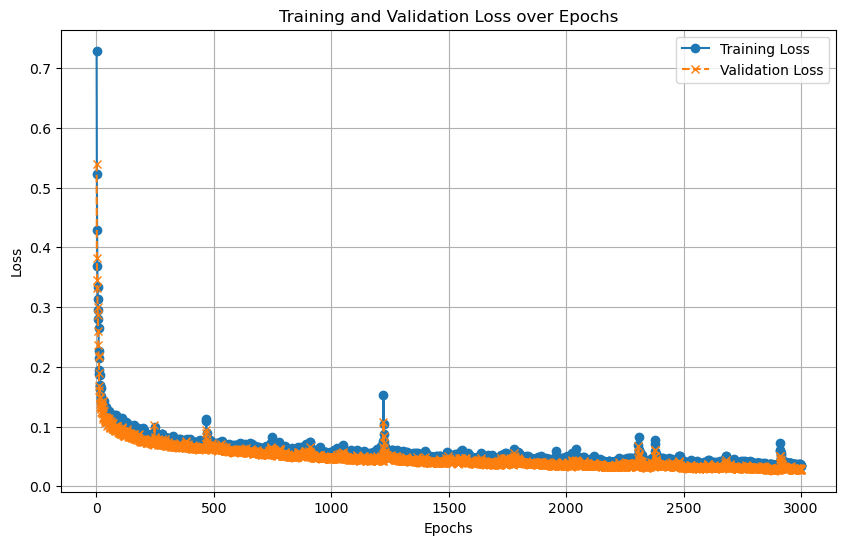

In [ ]:
import matplotlib.pyplot as plt

# Assuming `history.history` contains training and validation loss data
# Replace with your actual `history.history` dictionary
history_dict = history.history  # If using your model's `history` object

# Extract loss values
loss = history_dict['rmse']        # Training loss
val_loss = history_dict['val_rmse']  # Validation loss
epochs = range(1, len(loss) + 1)

# Plot Training and Validation Loss
plt.figure(figsize=(10, 6))
plt.plot(epochs, loss, label='Training Loss', marker='o', linestyle='-')
plt.plot(epochs, val_loss, label='Validation Loss', marker='x', linestyle='--')
plt.title('Training and Validation Loss over Epochs')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.grid(True)
plt.show()

42/42 [==============================] - 7s 30ms/step


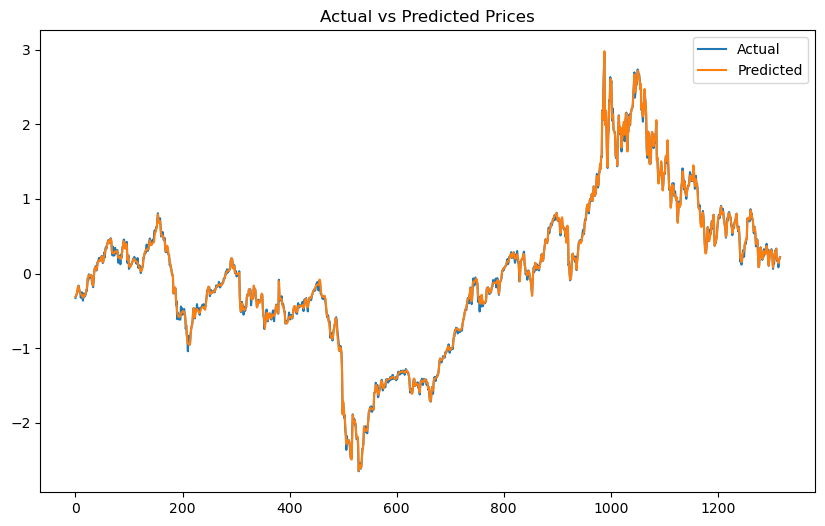

In [ ]:
# 예측
y_pred = model.predict(X_test)

# 시각화
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 6))
plt.plot(y_test, label='Actual')
plt.plot(y_pred, label='Predicted')
plt.legend()
plt.title('Actual vs Predicted Prices')
plt.show()